# Neural Network to Classify Hand-Written Digits


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv('train.csv')
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

train_data = data[0:int(0.8*m), :]
val_data = data[int(0.8*m):m, :]

X_train = train_data[:, 1:].T
X_train = X_train / 255.0
Y_train = train_data[:, 0]

X_val = val_data[:, 1:].T
X_val = X_val / 255.0
Y_val = val_data[:, 0]



In [4]:
def initialize_parameters():
  W1 = np.random.rand(10, 784) - 0.5
  B1 = np.random.rand(10, 1) - 0.5
  W2 = np.random.rand(10, 10) - 0.5
  B2 = np.random.rand(10, 1) - 0.5
  return W1, B1, W2, B2

def ReLU(X):
  return np.maximum(X, 0)

def softmax_calculator(Z):
  return np.exp(Z) / sum(np.exp(Z))

def forward_propagation(W1, B1, W2, B2, X):
  Z1 = W1.dot(X) + B1
  A1 = ReLU(Z1)
  Z2 = W2.dot(A1) + B2
  A2 = softmax_calculator(Z2)
  return Z1, A1, Z2, A2

def one_hot_converter(Y):
  one_hot_Y = np.zeros((Y.size, Y.max() + 1))
  one_hot_Y[np.arange(Y.size), Y] = 1
  return one_hot_Y.T

def backward_propagation(W1, B1, W2, B2, Z1, A1, Z2, A2, X, Y):
  one_hot_Y = one_hot_converter(Y)
  dZ2 = A2 - one_hot_Y
  dW2 = 1 / m * dZ2.dot(A1.T)
  dB2 = 1 / m * np.sum(dZ2)
  dZ1 = W2.T.dot(dZ2) * (Z1 > 0)
  dW1 = 1 / m * dZ1.dot(X.T)
  dB1 = 1 / m * np.sum(dZ1)
  return dW1, dB1, dW2, dB2

def update_parameters(W1, B1, W2, B2, dW1, dB1, dW2, dB2, learning_rate):
  W1 = W1 - learning_rate * dW1
  B1 = B1 - learning_rate * dB1
  W2 = W2 - learning_rate * dW2
  B2 = B2 - learning_rate * dB2
  return W1, B1, W2, B2

def get_predictions(A2):
  return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
  return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
  W1, B1, W2, B2 = initialize_parameters()

  for i in range(iterations):
    Z1, A1, Z2, A2 = forward_propagation(W1, B1, W2, B2, X)
    dW1, dB1, dW2, dB2 = backward_propagation(W1, B1, W2, B2, Z1, A1, Z2, A2, X, Y)
    W1, B1, W2, B2 = update_parameters(W1, B1, W2, B2, dW1, dB1, dW2, dB2, alpha)

    if (i%20)==0:
      print("Iteration number: ", i)
      print("Accuracy = ", get_accuracy(get_predictions(A2), Y))
  return W1, B1, W2, B2

In [5]:
W1, B1, W2, B2 = gradient_descent(X_train, Y_train, 0.1, 1000)

Iteration number:  0
Accuracy =  0.09547619047619048
Iteration number:  20
Accuracy =  0.3036309523809524
Iteration number:  40
Accuracy =  0.4079761904761905
Iteration number:  60
Accuracy =  0.4825297619047619
Iteration number:  80
Accuracy =  0.5496130952380952
Iteration number:  100
Accuracy =  0.5955654761904762
Iteration number:  120
Accuracy =  0.6373809523809524
Iteration number:  140
Accuracy =  0.6715178571428572
Iteration number:  160
Accuracy =  0.6997916666666667
Iteration number:  180
Accuracy =  0.7225892857142857
Iteration number:  200
Accuracy =  0.7402380952380953
Iteration number:  220
Accuracy =  0.7549702380952381
Iteration number:  240
Accuracy =  0.7682440476190476
Iteration number:  260
Accuracy =  0.7791964285714286
Iteration number:  280
Accuracy =  0.7886904761904762
Iteration number:  300
Accuracy =  0.7962797619047619
Iteration number:  320
Accuracy =  0.8032738095238096
Iteration number:  340
Accuracy =  0.8097916666666667
Iteration number:  360
Accuracy =

Predicted label:  [9]
Actual label:  9


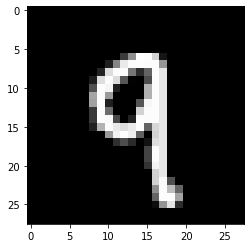

In [8]:
val_index = 560
Z1val, A1val, Z2val, A2val = forward_propagation(W1, B1, W2, B2, X_val[:, val_index, None])
print("Predicted label: ", get_predictions(A2val))
print("Actual label: ", Y_val[val_index])

image_array = X_val[:,val_index].reshape(28,28)
plt.imshow(image_array, cmap='gray')
plt.show()

In [7]:
Z1val, A1val, Z2val, A2val = forward_propagation(W1, B1, W2, B2, X_val)
val_acc = get_accuracy(get_predictions(A2val), Y_val)
print("Validation accuracy = ", val_acc)

Validation accuracy =  0.8764285714285714
